In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# data = pd.read_csv("C://Users//Aaryan//Downloads//archive//heart.csv")
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

In [6]:
data.size

14350

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

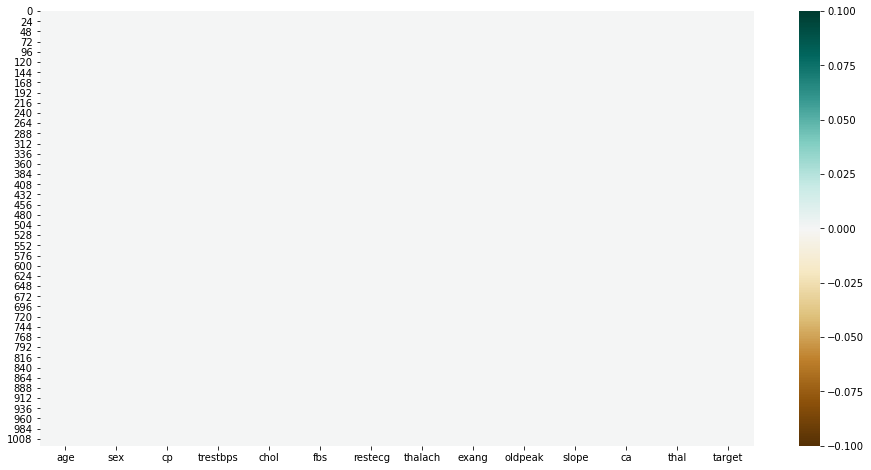

In [8]:
### visualize in the heatmap
plt.figure(figsize = (16,8))
sns.heatmap(data.isna(),cmap='BrBG')

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# Gender wise Analysis
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

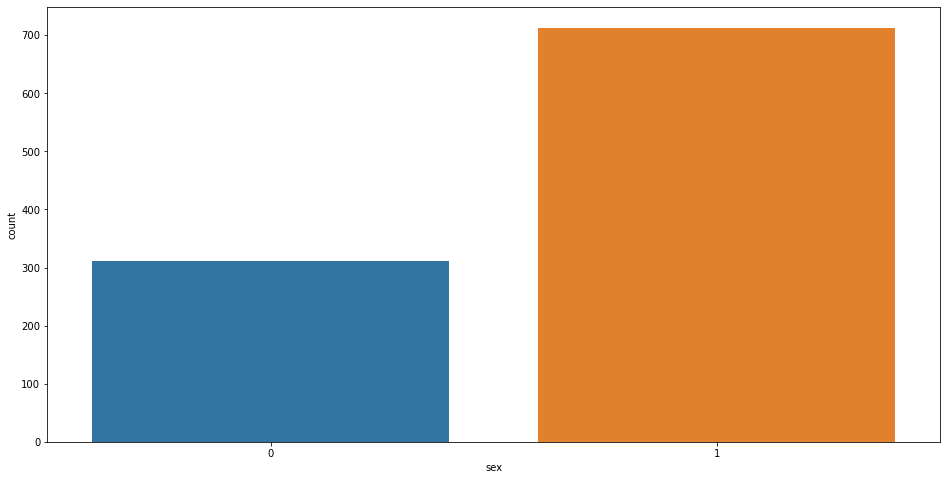

In [11]:
plt.figure(figsize = (16,8))
sns.countplot(data['sex'])

In [12]:
tot = data['target'].groupby(data['sex']).count()
suff = data['target'].groupby(data['sex']).sum()
not_suf = tot-suff
not_suf

sex
0     86
1    413
Name: target, dtype: int64

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

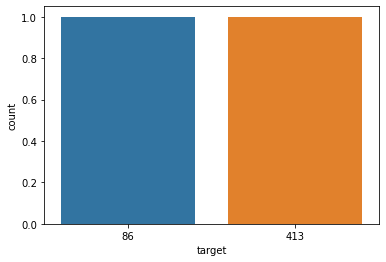

In [13]:
sns.countplot(not_suf)

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

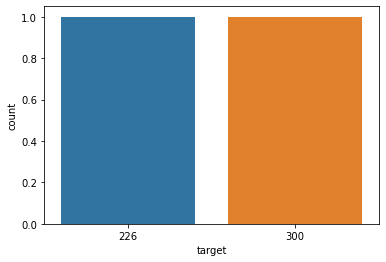

In [14]:
sns.countplot(suff)

In [15]:
female_suffered = suff[0]
male_suffered = suff[1]

In [16]:
total_gend = data['sex'].count()
print("Female suffered percent ", (female_suffered/total_gend)*100)

Female suffered percent  22.04878048780488


In [17]:
total_gend = data['sex'].count()
print("Male suffered percent ", (male_suffered/total_gend)*100)

Male suffered percent  29.268292682926827


In [18]:
data["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

(array([497.,   0.,   0.,   0.,   0., 513.,   0.,   0.,   0.,  15.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

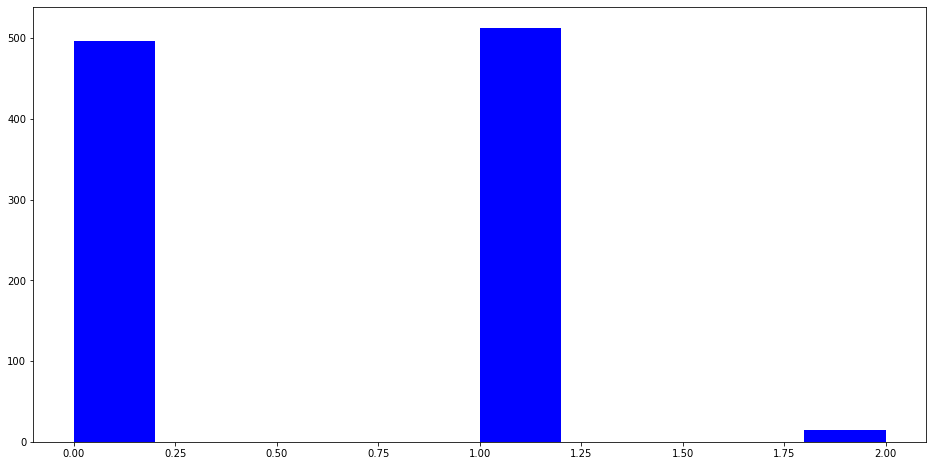

In [19]:
plt.figure(figsize = (16,8))
plt.hist(data["restecg"],color='blue')

In [20]:
data['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

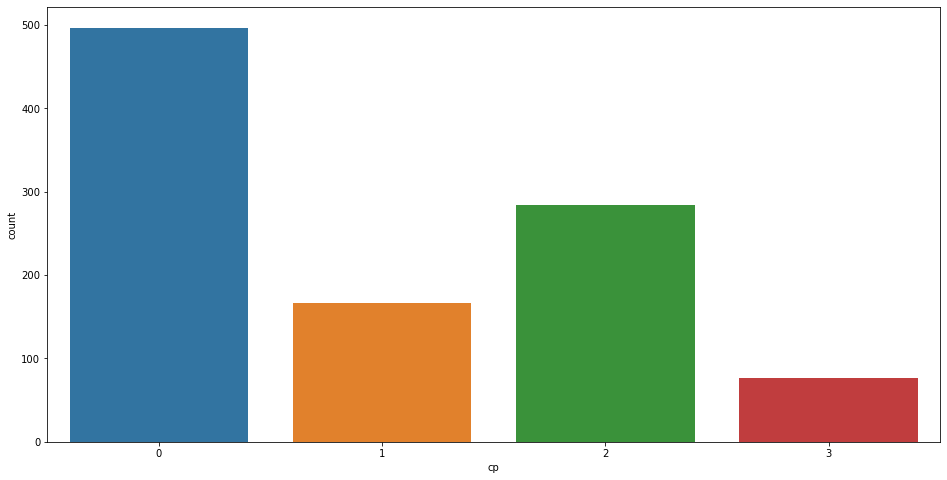

In [21]:
plt.figure(figsize = (16,8))
sns.countplot(data['cp'])

In [22]:
count_me = data['target'].groupby(data['cp']).count()
sum_me = data['target'].groupby(data['cp']).sum()
sum_me

cp
0    122
1    134
2    219
3     51
Name: target, dtype: int64

In [23]:
no_risk = count_me-sum_me

In [24]:
print("{} of people who have ASY got heart disease and {} of people who have ASY doesn't get heart disease.".format(sum_me[0],no_risk[0]))

122 of people who have ASY got heart disease and 375 of people who have ASY doesn't get heart disease.


In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
s = data["sex"].unique()
c = data["cp"].unique()
r = data["restecg"].unique()
e = data["exang"].unique()
sl = data["slope"].unique()
print(s)
print(c)
print(r)
print(e)
print(sl)

[1 0]
[0 1 2 3]
[1 0 2]
[0 1]
[2 0 1]


In [27]:
#label = data["HeartDisease"].copy()

data["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

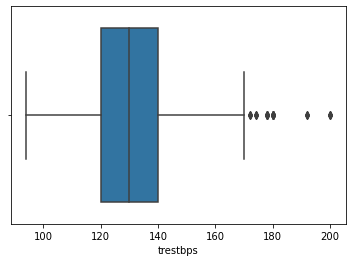

In [28]:
sns.boxplot(data["trestbps"])

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

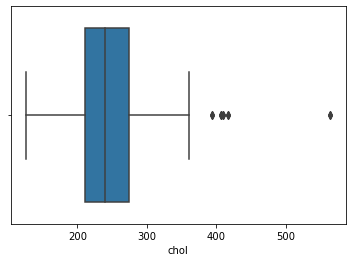

In [29]:
sns.boxplot(data["chol"])

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

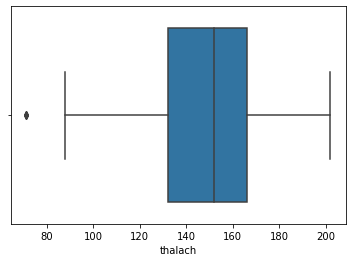

In [30]:
sns.boxplot(data["thalach"])

In [31]:
#### Remove the outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
IQR

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [32]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]
data.shape

(769, 14)

C:\Users\Aaryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

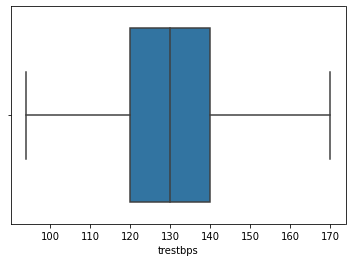

In [33]:
sns.boxplot(data["trestbps"])

In [34]:
label = data["target"].copy()
data = data.drop("target",axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [36]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [37]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.80      0.83        64\n           1       0.86      0.91      0.89        90\n\n    accuracy                           0.86       154\n   macro avg       0.86      0.85      0.86       154\nweighted avg       0.86      0.86      0.86       154\n'

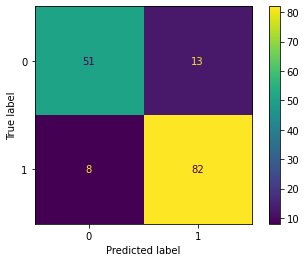

In [38]:
plot_confusion_matrix(lor,X_test,y_test)
plt.show()  

In [39]:
#printing the accuracy for test set
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of Logistic Regression model is 86.36363636363636


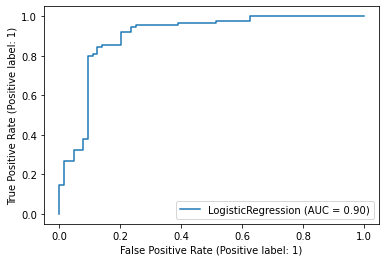

In [40]:
metrics.plot_roc_curve(lor, X_test, y_test)

In [41]:
mdl = DecisionTreeClassifier(criterion="entropy", max_depth=6)
mdl.fit(X_train,y_train)
y_p = mdl.predict(X_test)

In [42]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        64
           1       0.95      0.88      0.91        90

    accuracy                           0.90       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.90      0.90       154



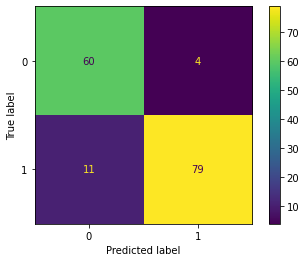

In [43]:
plot_confusion_matrix(mdl,X_test,y_test)
plt.show()  

In [44]:
# printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,y_p)*100))

Accuracy of Decision Tree model is 90.25974025974025


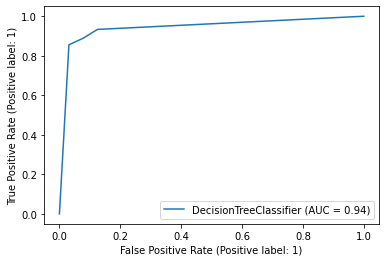

In [45]:
metrics.plot_roc_curve(mdl, X_test, y_test)

In [46]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train, y_train)
pp = clf.predict(X_test)

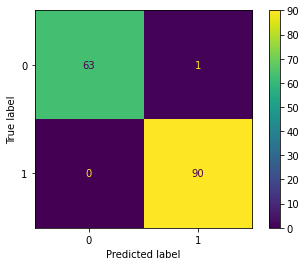

In [47]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()  

In [48]:
# printing the accuracy for test set
print('Accuracy of Random forest classifier model is {}'.format(accuracy_score(y_test,pp)*100))

Accuracy of Random forest classifier model is 99.35064935064936


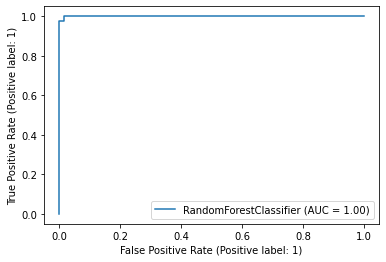

In [49]:
metrics.plot_roc_curve(clf, X_test, y_test)